In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

In [2]:
data = np.array([9, 2, 3, 4, 10, 6, 7, 8, 1, 5])
data

array([ 9,  2,  3,  4, 10,  6,  7,  8,  1,  5])

In [3]:
data.dtype

dtype('int64')

In [4]:
print("次元数：", data.ndim)
print("要素数：", data.size)

次元数： 1
要素数： 10


In [5]:
data.sort()
data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
data[::-1].sort()
data

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [7]:
random.seed(0)

In [8]:
# 正規分布（平均０、分散１）の乱数を１０個発生
rnd_data = random.randn(10)
rnd_data

array([ 1.764,  0.4  ,  0.979,  2.241,  1.868, -0.977,  0.95 , -0.151,
       -0.103,  0.411])

In [9]:
# 抽出対象データ
data = np.array([9, 2, 3, 4, 10, 6, 7, 8, 1, 5])

# ランダム抽出
print(random.choice(data, 10))

[ 7  8  8  1  2  6  5  1  5 10]


In [10]:
print(random.choice(data, 10, replace = False))

[10  2  7  8  3  1  6  5  9  4]


## 行列

In [11]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
array1 = np.arange(9).reshape(3, 3)
print(array1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [13]:
print(array1[0, :])

[0 1 2]


In [14]:
array1[:, 0]

array([0, 3, 6])

#### 行列の演算

In [15]:
array2 = np.arange(9, 18).reshape(3, 3)
array2

array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [16]:
# 行列の積
np.dot(array1, array2)

array([[ 42,  45,  48],
       [150, 162, 174],
       [258, 279, 300]])

In [17]:
# 要素同士の積
array1 * array2

array([[  0,  10,  22],
       [ 36,  52,  70],
       [ 90, 112, 136]])

In [18]:
print(np.zeros((2, 3), dtype=np.int64))

[[0 0 0]
 [0 0 0]]


In [19]:
print(np.ones((2, 3), dtype=np.int64))

[[1 1 1]
 [1 1 1]]


## Scipy の基礎

In [20]:
# 線形代数用のライブラリ
import scipy.linalg as linalg

# 最適化計算用の関数
from scipy.optimize import minimize_scalar

### 行列式と逆行列

In [21]:
matrix = np.array(
    [
        [1, -1, -1],
        [-1, -1, -1],
        [-1, -1, 1]
    ]
)

# 行列式
print("行列式")
print(linalg.det(matrix))

行列式
-4.0


In [22]:
print("逆行列")
print(linalg.inv(matrix))

逆行列
[[ 0.5 -0.5 -0. ]
 [-0.5  0.  -0.5]
 [ 0.  -0.5  0.5]]


In [23]:
print(matrix.dot(linalg.inv(matrix)))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 固有値と固有ベクトル

In [24]:
# 固有値と固有ベクトル
eig_value, eig_vector = linalg.eig(matrix)

print("固有値")
print(eig_value)
print("固有ベクトル")
print(eig_vector)

固有値
[-2.+0.j  2.+0.j  1.+0.j]
固有ベクトル
[[ 4.082e-01  7.071e-01  5.774e-01]
 [ 8.165e-01  3.817e-16 -5.774e-01]
 [ 4.082e-01 -7.071e-01  5.774e-01]]


## ニュートン法

### 方程式の解を求める

In [25]:
# 関数の定義
def my_function(x):
    return (x**2 + 2*x + 1)

# ニュートン法の読み込み
from scipy.optimize import newton

# 計算実行
print(newton(my_function, 0))

-0.9999999852953906


### 最小値を求める

In [26]:
# 計算実行
print(minimize_scalar(my_function, method="Brent"))

     fun: 0.0
    nfev: 9
     nit: 4
 success: True
       x: -1.0000000000000002


## Series

In [27]:
from pandas import Series, DataFrame

In [28]:
sample_pandas_data = pd.Series([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
print(sample_pandas_data)

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64


In [29]:
# index をアルファベットでつける
sample_pandas_index_data = pd.Series(
  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
)
print(sample_pandas_index_data)

a     0
b    10
c    20
d    30
e    40
f    50
g    60
h    70
i    80
j    90
dtype: int64


In [30]:
print("データの値：", sample_pandas_index_data.values)
print("インデックスの値：", sample_pandas_index_data.index)

データの値： [ 0 10 20 30 40 50 60 70 80 90]
インデックスの値： Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')


## DataFrame

In [31]:
attri_data1 = {"ID": ["100", "101", "102", "103", "104"],
              "City": ["Tokyo", "Osaka", "Kyoto", "Hokkaido", "Tokyo"],
              "Birth_year": [1990, 1989, 1992, 1997, 1982],
              "Name": ["Hiroshi", "Akiko", "Yuki", "Satoru", "Steve"]}

attri_data_frame = DataFrame(attri_data1)

print(attri_data_frame)

    ID      City  Birth_year     Name
0  100     Tokyo        1990  Hiroshi
1  101     Osaka        1989    Akiko
2  102     Kyoto        1992     Yuki
3  103  Hokkaido        1997   Satoru
4  104     Tokyo        1982    Steve


In [32]:
attri_data_frame_index1 = DataFrame(attri_data1, index=["a", "b", "c", "d", "e"])
print(attri_data_frame_index1)

    ID      City  Birth_year     Name
a  100     Tokyo        1990  Hiroshi
b  101     Osaka        1989    Akiko
c  102     Kyoto        1992     Yuki
d  103  Hokkaido        1997   Satoru
e  104     Tokyo        1982    Steve


In [33]:
attri_data_frame_index1

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
c,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
e,104,Tokyo,1982,Steve


### 行列操作

In [34]:
# 転置行列
attri_data_frame.T

,0,1,2,3,4
ID,100,101,102,103,104
City,Tokyo,Osaka,Kyoto,Hokkaido,Tokyo
Birth_year,1990,1989,1992,1997,1982
Name,Hiroshi,Akiko,Yuki,Satoru,Steve


In [35]:
# 特定の列のみを取り出す
# 列名の指定（一つの場合）
attri_data_frame.Birth_year

0    1990
1    1989
2    1992
3    1997
4    1982
Name: Birth_year, dtype: int64

In [36]:
# 列名の指定（複数の場合）
attri_data_frame[["ID", "Birth_year"]]

,ID,Birth_year
0,100,1990
1,101,1989
2,102,1992
3,103,1997
4,104,1982


### データの抽出

In [37]:
# 条件（フィルター）
attri_data_frame[attri_data_frame["City"] == "Tokyo"]

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
4,104,Tokyo,1982,Steve


In [38]:
# 条件（フィルター、複数の値）
attri_data_frame[attri_data_frame["City"].isin(["Tokyo", "Osaka"])]

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
4,104,Tokyo,1982,Steve


### 列や行の削除

- 行の削除 : axis = 0
- 列の削除：axis = 1

In [40]:
attri_data_frame.drop(["Birth_year"], axis=1)

,ID,City,Name
0,100,Tokyo,Hiroshi
1,101,Osaka,Akiko
2,102,Kyoto,Yuki
3,103,Hokkaido,Satoru
4,104,Tokyo,Steve


### データの結合

In [42]:
attri_data2 = {"ID":["100", "101", "102", "105", "107"],
              "Math": [50, 43, 33, 76, 98],
              "English": [90, 30, 20, 50, 30],
              "Sex": ["M", "F", "F", "M", "M"]}
attri_data_frame2 = DataFrame(attri_data2)
attri_data_frame2

,ID,Math,English,Sex
0,100,50,90,M
1,101,43,30,F
2,102,33,20,F
3,105,76,50,M
4,107,98,30,M


In [47]:
# データのマージ（キー明示しない場合は自動で同じキーを探し出し結合する）
pd.merge(attri_data_frame, attri_data_frame2)

,ID,City,Birth_year,Name,Math,English,Sex
0,100,Tokyo,1990,Hiroshi,50,90,M
1,101,Osaka,1989,Akiko,43,30,F
2,102,Kyoto,1992,Yuki,33,20,F


## 集計

In [48]:
# データのグループ集計
attri_data_frame2.groupby("Sex")["Math"].mean()

Sex
F    38.000000
M    74.666667
Name: Math, dtype: float64

## 値のソート

In [49]:
attri_data2 = {'ID':['100','101','102','103','104'],
               'City':['Tokyo','Osaka','Kyoto','Hokkaido','Tokyo'],
               'Birth_year':[1990,1989,1992,1997,1982],
               'Name':['Hiroshi','Akiko','Yuki','Satoru','Steve']}
attri_data_frame2 = DataFrame(attri_data2)
attri_data_frame_index2 = DataFrame(attri_data2,index=['e','b','a','d','c'])
attri_data_frame_index2

,ID,City,Birth_year,Name
e,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
a,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
c,104,Tokyo,1982,Steve


In [50]:
# index にソート
attri_data_frame_index2.sort_index()

,ID,City,Birth_year,Name
a,102,Kyoto,1992,Yuki
b,101,Osaka,1989,Akiko
c,104,Tokyo,1982,Steve
d,103,Hokkaido,1997,Satoru
e,100,Tokyo,1990,Hiroshi


In [51]:
# 値によるソート、デフォルトは昇順
attri_data_frame_index2.Birth_year.sort_values()

c    1982
b    1989
e    1990
a    1992
d    1997
Name: Birth_year, dtype: int64

## nan(null) の判定

In [52]:
# 値があるかどうかの確認
attri_data_frame_index2.isin(["Tokyo"])

,ID,City,Birth_year,Name
e,False,True,False,False
b,False,False,False,False
a,False,False,False,False
d,False,False,False,False
c,False,True,False,False


In [53]:
# 欠損値の取り扱い
attri_data_frame_index2["Name"] = np.nan
attri_data_frame_index2.isnull()

,ID,City,Birth_year,Name
e,False,False,False,True
b,False,False,False,True
a,False,False,False,True
d,False,False,False,True
c,False,False,False,True


In [54]:
# null を判定し、合計する
attri_data_frame_index2.isnull().sum()

ID            0
City          0
Birth_year    0
Name          5
dtype: int64

## 散布図

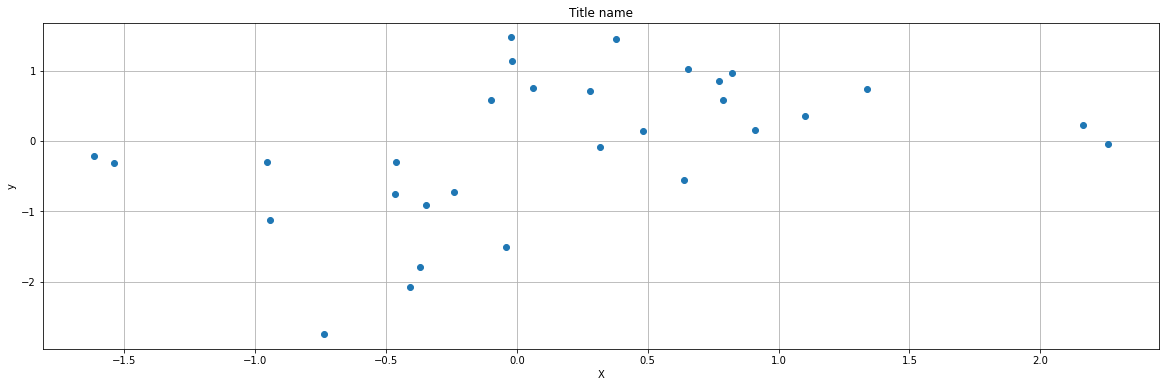

In [58]:
x = np.random.randn(30)
y = np.sin(x) + np.random.randn(30)

# グラフの大きさ
plt.figure(figsize = (20, 6))
# グラフの描写
plt.plot(x, y, 'o')

# タイトル
plt.title("Title name")
# X の座標名
plt.xlabel("X")
# y の座標名
plt.ylabel("y")

# grid の表示
plt.grid(True)

## グラフの分割

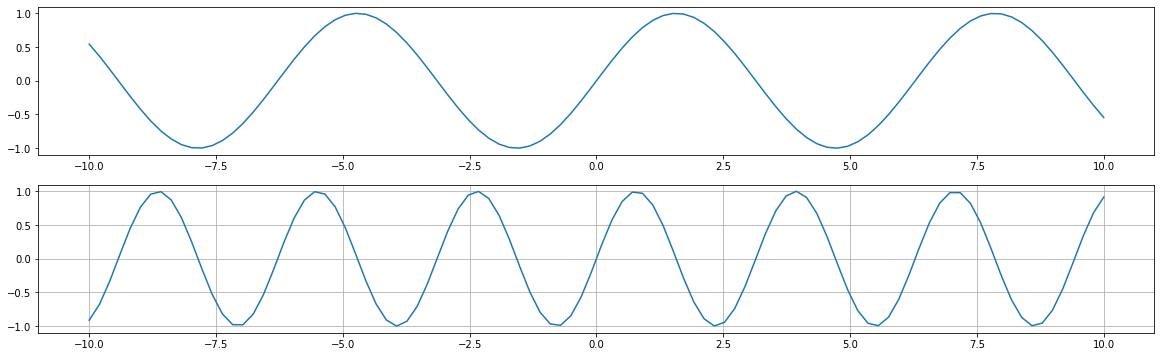

In [59]:
# グラフの大きさを指定
plt.figure(figsize=(20, 6))

# 2行1列の１つ目
plt.subplot(2, 1, 1)
x = np.linspace(-10, 10, 100)
plt.plot(x, np.sin(x))

# 2行1列の２つ目
plt.subplot(2, 1, 2)
y = np.linspace(-10, 10, 100)
plt.plot(y, np.sin(2*y))

plt.grid(True)

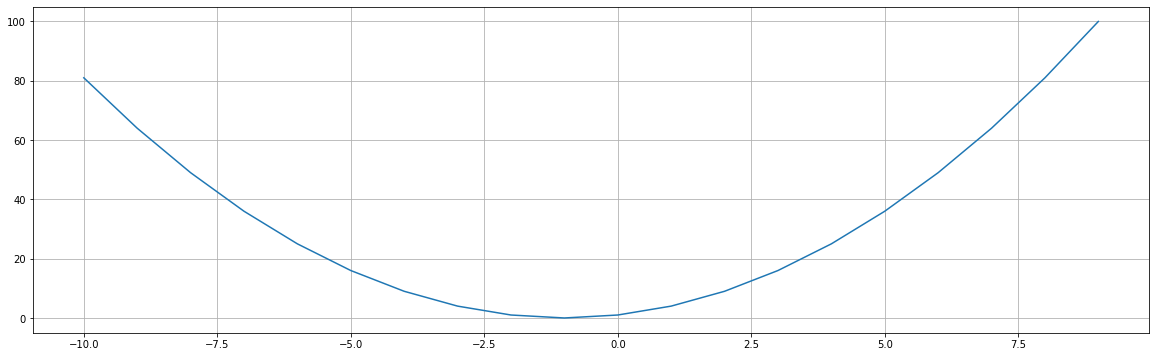

In [61]:
# 関数の定義
def my_function(x):
    return x ** 2 + 2 * x + 1

x = np.arange(-10, 10)
plt.figure(figsize=(20, 6))
plt.plot(x, my_function(x))
plt.grid(True)

## ヒストグラム

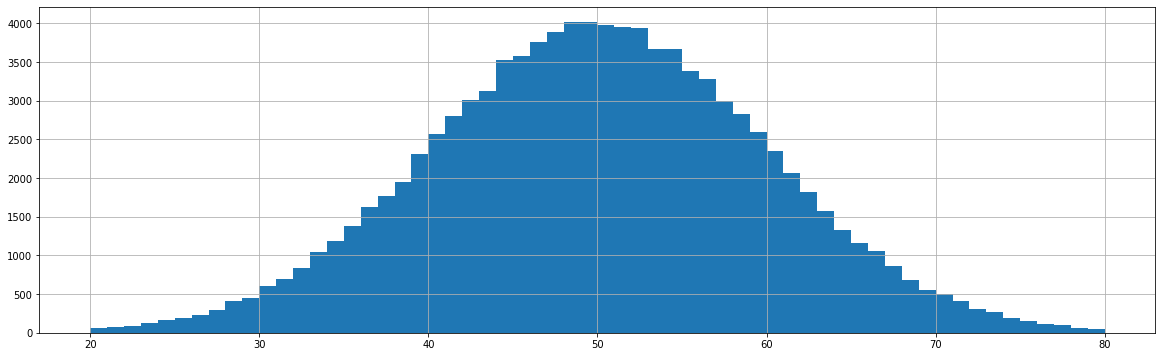

In [63]:
random.seed(0)

plt.figure(figsize=(20, 6))

plt.hist(np.random.randn(10**5)*10 + 50, bins=60, range=(20, 80))

plt.grid(True)

In [ ]:
?p